# Simple linear regression

## Import the relevant libraries

In [42]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [43]:
# We start by loading the data
data = pd.read_csv('simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [44]:
# There is a single independent variable: 'SAT'
x = data['SAT'].values

# and a single depended variable: 'GPA'
y = data['GPA'].values


In [45]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [46]:
y.shape

(84,)

In [47]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.reshape(-1,1)

# Check the shape just in case
x_matrix.shape


(84, 1)

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [48]:
# We start by creating a linear regression object
reg = LinearRegression()

In [49]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)


LinearRegression()

In [50]:
reg.score(x_matrix, y)

0.40600391479679765

In [51]:
reg.coef_

array([0.00165569])

In [52]:
reg.intercept_

0.27504029966028076

In [53]:
reg.predict(np.array([1760]).reshape(-1, 1))

array([3.18905127])

In [54]:
df = pd.DataFrame(data=[1400, 1600], columns=['SAT'])
df

,SAT
0,1400
1,1600


In [55]:
reg.predict(df)

/home/ayodeji/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([2.59300357, 2.92414118])

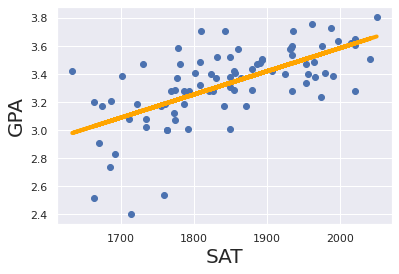

In [57]:
# Create a scatter plot
plt.scatter(x,y)
# Define the regression equation, so we can plot it later
yhat = reg.coef_*x_matrix + reg.intercept_
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()